In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

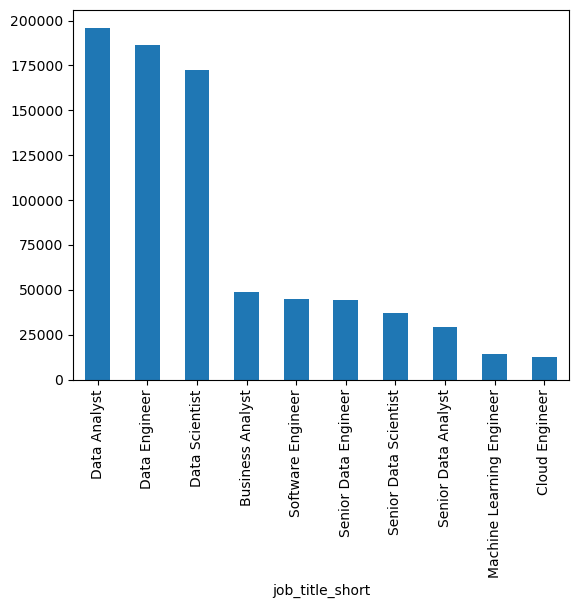

In [2]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind = 'bar', ax = ax)

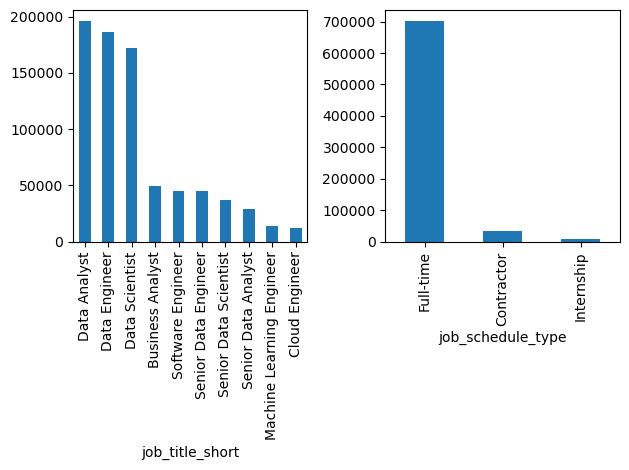

In [6]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

plt.show()

In [18]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
df_skills = df_skills.pivot_table(index = 'job_skills', columns='job_title_short', aggfunc = 'size', fill_value = 0)
df_skills

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_skills,,,,,,,,,,
airflow,318,260,2002,25505,3915,1164,596,8694,1403,1397
airtable,17,2,88,68,65,5,10,20,10,11
alteryx,1078,28,4570,2294,2068,61,1186,467,430,115
angular,87,138,376,1446,736,92,54,303,101,2021
angular.js,0,6,2,45,12,1,0,19,0,30
...,...,...,...,...,...,...,...,...,...,...
wrike,4,1,39,6,8,0,10,0,1,4
wsl,0,0,16,16,31,3,1,2,14,13
xamarin,0,6,2,10,5,1,0,3,0,35


In [23]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [29]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Business Analyst',
 'Software Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [31]:
job_titles = job_titles[0:3]
job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_skills = df.copy
df_skills = df.explode('job_skills')

In [5]:
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
skills_count

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [12]:
df_skills_count = skills_count.reset_index(name = 'skill count')
df_skills_count

,job_skills,job_title_short,skill count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [16]:
df_skills_count.sort_values(by = 'skill count', ascending = False, inplace = True)
df_skills_count

,job_skills,job_title_short,skill count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
965,laravel,Senior Data Analyst,1
225,capacitor,Business Analyst,1
664,gatsby,Machine Learning Engineer,1
1582,rocketchat,Software Engineer,1


In [36]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Business Analyst',
 'Software Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [37]:
job_titles = job_titles[:3]
job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

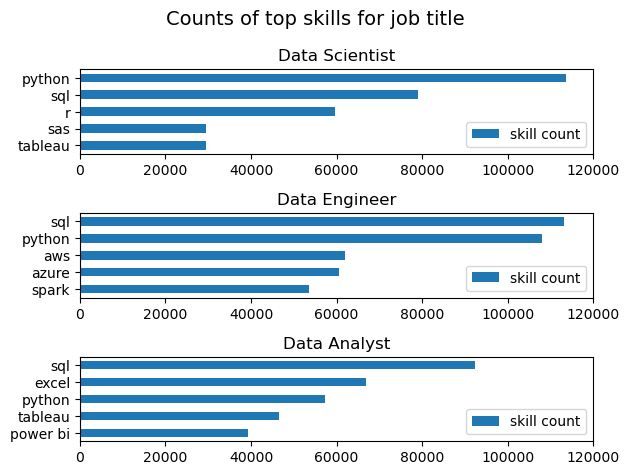

In [49]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible('False')
    ax[i].set_xlim(0, 120000)
fig.suptitle('Counts of top skills for job title', fontsize = 14)
fig.tight_layout()
plt.show()